Tensorflow was developed 2015

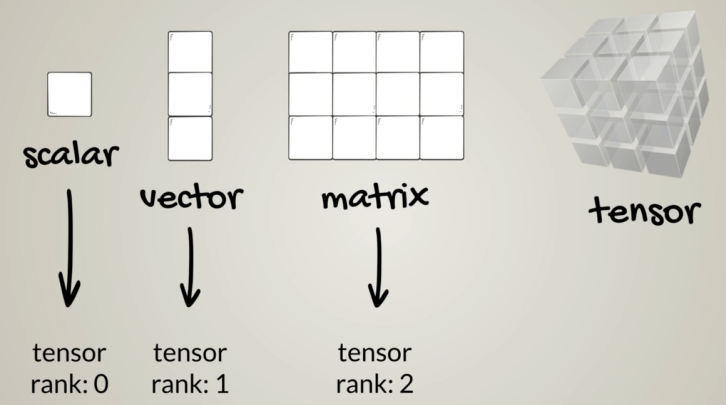

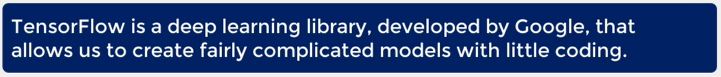


TensorFlow 2 is based on Keras


## 1. Basic Neural Network using Tensorflow


[[ 2.0556557]
 [-3.0330248]]
[4.9623785]


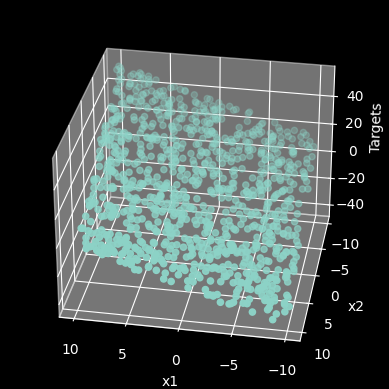

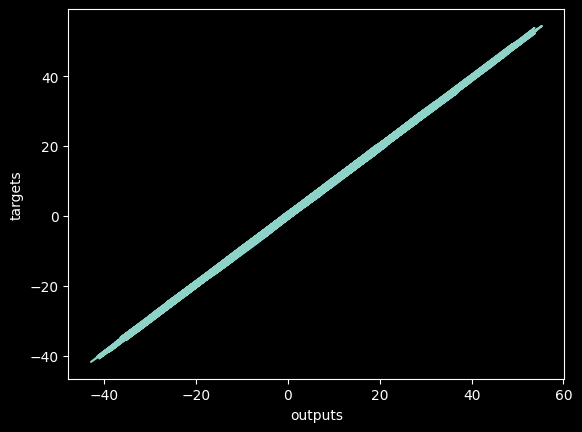

In [25]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### DATA###
# 1.Generate random input data to train on
observations = 1000
x1 = np.random.uniform(low=-10, high=10, size=(observations, 1))
x2 = np.random.uniform(low=-10, high=10, size=(observations, 1))

inputs = np.column_stack((x1, x2))
# print(inputs)

# 2.Create the targets we will aim at
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2 * x1 - 3 * x2 + 5 + noise

# 3.Save the inputs and outputs as ndarray and the file name is TF_Intro.npz
np.savez("TF_Intro", inputs=inputs, targets=targets)

### Solving with TensorFlow###
# loading data
training_data = np.load("TF_Intro.npz")

# input and output size
input_size = 2
output_size = 1

### MODEL###
# tf.keras.Sequential(): function that spacifies how the model will be laid down ('stacks layers')
# tf.keras.layers.Dense(output_size): same as output=np.dot(inputs,weights)+bias
# thus model is initialized

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            output_size,
            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        )
    ]
)
# optionally we can initialize biases and weights
# model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

### OPTIMIZING FUNCTION and OBJECTIVE FUNCTION ###
# model.compile(optimizer="sgd", loss="mean_squared_error")
# optionally we can initialize learning rate, biases and weights
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(
    custom_optimizer,
    loss="mean_squared_error",
)

# 4.fitting the model by inputs and outputs
# Iteration over the full dataset to fit the model is called Epoch
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=0)
# here 100 epochs means 100 iterations for optimizing the weights and biases
# verbose means the output of the training progress
# here verbose = 0, stands for 'silent'
# here verbose = 1, stands for 'progress bar'
# here verbose = 2, stands for 'one line per epoch'

# Extract the weights and biases
weights, biases = model.layers[0].get_weights()
print(weights)
print(biases)
# and the weights and biases for the model is closed to the linear regression: 2.x1 - 3.x2 + 5 + noise

# Extract the outputs(make predictions)
outputs = model.predict_on_batch(training_data["inputs"]).round(1)
targets = training_data["targets"].round(1)

# 5.plotin data train data
targets = targets.reshape(observations, 1)
fig = plt.figure()
axis = fig.add_subplot(111, projection="3d")
# axis.plot(x1,x2,targets)
axis.scatter(x1, x2, targets)
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_zlabel("Targets")
axis.view_init(azim=100)
plt.show()

# 6. Plot last output vs targets
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()

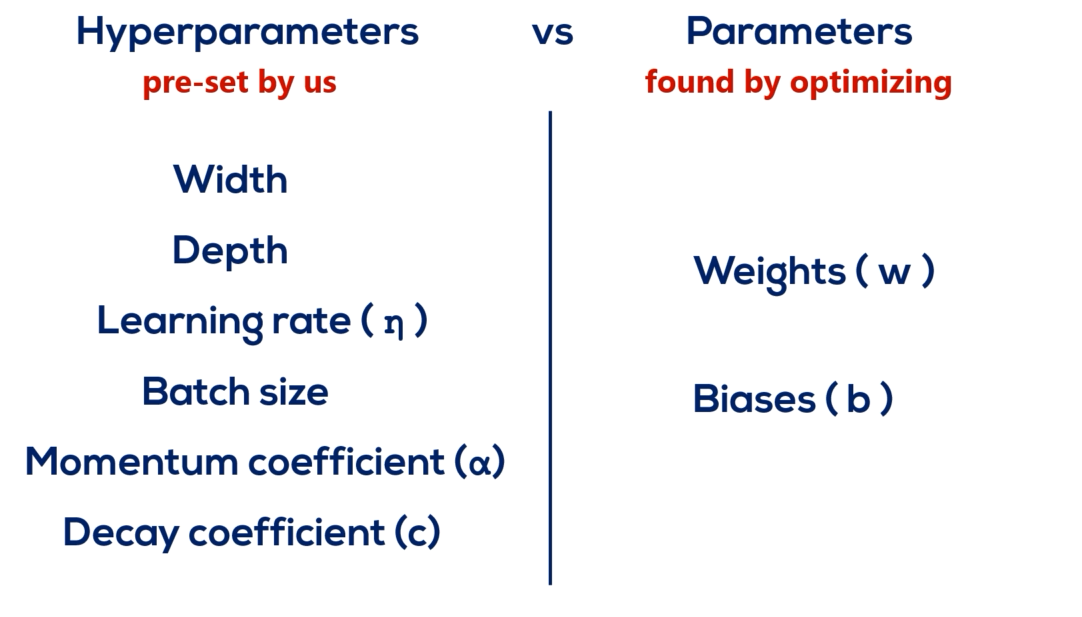


Optimization Function

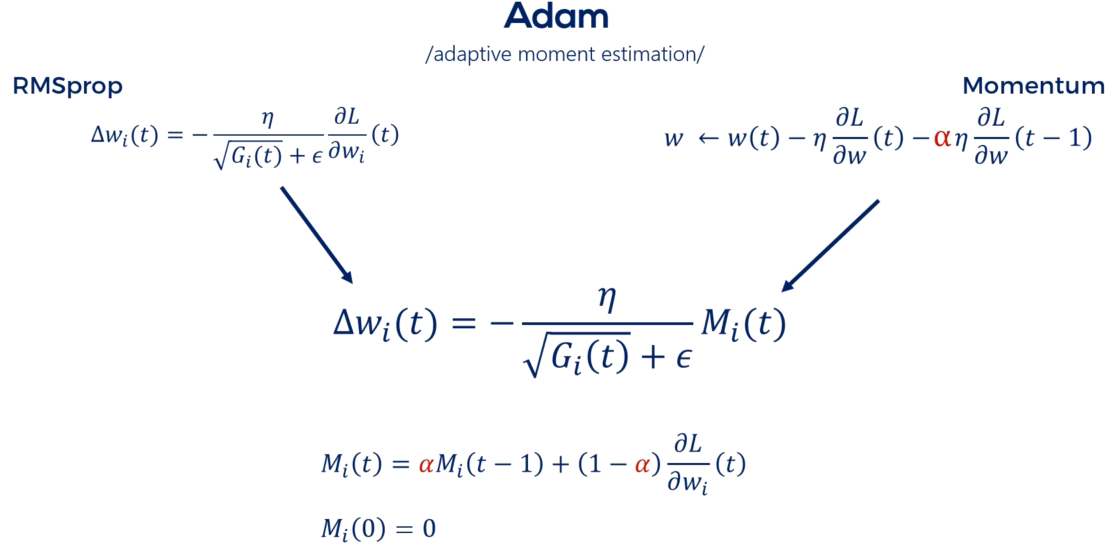
